# HW2- Steam Reviews


### Usefull libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from support_functions import *


In [3]:
def_ranges = [('06:00:00', '10:59:59'),
('11:00:00', '13:59:59'),
('14:00:00', '16:59:59'),
('17:00:00', '19:59:59'),
('20:00:00', '23:59:59'),
('00:00:00', '02:59:59'),
('03:00:00', '05:59:59')]

total_dataframe = 'data/combinato_finale.csv'
timestamp_dataframe = 'data/datetime_dataframe'
df = pd.read_csv(total_dataframe)

# [RQ1]: Exploratory Data Analysis

In [ ]:
#eliminate duplicates
df=df.drop_duplicates(subset=['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'], keep='first', inplace=False, ignore_index=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 24 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unnamed: 0                      int64         
 1   app_id                          int64         
 2   app_name                        object        
 3   review_id                       int64         
 4   language                        object        
 5   review                          object        
 6   timestamp_created               datetime64[ns]
 7   timestamp_updated               datetime64[ns]
 8   recommended                     bool          
 9   votes_helpful                   int64         
 10  votes_funny                     int64         
 11  weighted_vote_score             float64       
 12  comment_count                   int64         
 13  steam_purchase                  bool          
 14  received_for_free               bool          
 

We can see that there are 23 columns, 8 integer,5 decimal, 4 boolean and 6 of other type.
The first one 'Unnamed' can be consider just like an index.


In [ ]:
df.head(3)

In [ ]:
df.isnull().sum()

It appears that the variables with missing values ​​are: 'review' (which contains the text itself) with 32723 null values , 'author.playtime_at_review' (Author playtime of reviewed app at time of review) with 24613 null values .
We should neglect other variables such as'author.playtime_forever','author.playtime_last_two_weeks', 'author.last_played ' since they have just 2 null values.

In [ ]:
df.describe()

We obtain a general overview of hour numerical variables with some of the most important statistical features:
for example, weighted_vote_score seems to have a small average velue justified by the presence of a large number of 0 (the second quantile is 0).
Another important variable is represented by author.num_reviews which provides a general indication of the fruition of 
the platform: there is a strong asymmetric distribution among the data and we could understand from the minumun, the quantiles and the maximun that a large number of people had made a very small number of reviews while , on the other hand, an extra small group provided an incredible amount of opinions.


In [ ]:
import seaborn as sns

In [ ]:
#seaborn.heatmap(df)
df_kor = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)



We see that there is a positive correlation (0.96) between the variables timestamp_created and timestamp_update and this is not 
surprising because most of the people never update their review ( most of the values stay the same).
It is also easy to understand the high correlation (0.83 ) between author.playtime_at_review and author.playtime_forever 
since the variable are the same untill the moment of the review.
For what concerns negative correlation, there is not any remarkable relationship.

Now let's focus on the variables that we consider more interesting. We start with app_name.

In [ ]:
#App_name LEO


df_new=df[['app_name']]
grp = df_new.groupby('app_name').size()

app_names=grp.sort_values(ascending=False)
app_names=pd.DataFrame(app_names)
app_names.columns=['Occurences']
app_names[:10]




In [ ]:
result=app_names['Occurences'][:10]
result.plot.pie()


In [ ]:
app_names.head(10).plot.bar( figsize=(5,5),
                            colormap = 'Pastel2', rot = 90, title = 'Numbers of apps',
                            xlabel = "App's name", ylabel = 'Occurencies')
plt.show()

In total there are 315 different apps, the most common are: PLAYERUNKNOWN'S BATTLEGROUNDS (8%),Grand Theft Auto V (5%) and.. (bo va visto sui dati tot).


Now we consider the language. The most common are...

In [ ]:
result=df["language"].value_counts(normalize=True)
result.head(20).plot.bar( figsize=(5,5),
                            colormap = 'Pastel2', rot = 90, title = 'Numbers of apps',
                            xlabel = "App's name", ylabel = 'Occurencies')

Recommended and steam_purchase 
We observe that 92% of review authors recommend the app and 78% of them purchased the app on Steam. But only 72% of the authors give a positive opinion and then actually buy the app.

In [ ]:
print(df["recommended"].value_counts(normalize=True))
print()

print(df["steam_purchase"].value_counts(normalize=True))

print(len(df[  (df.recommended == True) &(df.steam_purchase == True)  ])/ len(df['recommended']))


author.num_reviews :Number of lifetime app reviews by author
Con i dati veri si può fare un commento.


In [ ]:
print(df["author.num_reviews"].describe())


# RQ2: Let's explore the dataset by finding simple insights into the reviews.

In [17]:
dtype_dic= {'review_id':int,'app_name':str, 'language':str,
       'timestamp_created':int, 'timestamp_updated':int, 'recommended':bool,
       'votes_helpful':int, 'votes_funny':int, 'weighted_vote_score':float,
       'steam_purchase':bool, 'received_for_free':bool, 'author.steamid':int,
       'author.num_reviews':int,'author.playtime_forever':float,'author.playtime_at_review':float }
df = pd.read_csv('combinato_finale.csv',low_memory=False)# , dtype = dtype_dic)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000012 entries, 0 to 27000011
Data columns (total 18 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Unnamed: 0                 int64  
 1   Unnamed: 0.1               int64  
 2   Unnamed: 0.1.1             object 
 3   app_name                   object 
 4   review_id                  int64  
 5   language                   object 
 6   timestamp_created          float64
 7   timestamp_updated          object 
 8   recommended                object 
 9   votes_helpful              object 
 10  votes_funny                float64
 11  weighted_vote_score        float64
 12  steam_purchase             object 
 13  received_for_free          object 
 14  author.steamid             float64
 15  author.num_reviews         float64
 16  author.playtime_forever    float64
 17  author.playtime_at_review  float64
dtypes: float64(7), int64(3), object(8)
memory usage: 3.6+ GB


### Plot the number of reviews for each application in descending order.
We simply count the number of reviews for each app (grouped by app_name) and order them


<AxesSubplot:>

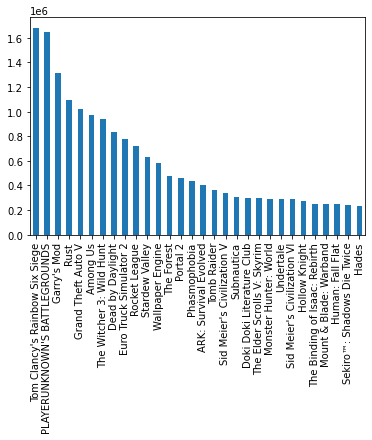

In [4]:
new = df[['app_name']]
a=new["app_name"].value_counts()
app_sort=a.sort_values(ascending=False) #lo salvo perchè serve dopo
app_sort.head(30).plot.bar()

### What applications have the best Weighted Vote Score?
We group by app_name, and see both which apps have the highest average weighted vote score


In [5]:
#In this way  the apps are sorted by  the score and then we can consider the top 5/10 (is up to us).
new_1 = df[['app_name','weighted_vote_score'  ]]
new_1.sort_values(by='weighted_vote_score',ascending=False)
#In this way I compute the average score for each app
new_1.groupby('app_name').agg({"weighted_vote_score":"mean"})
#LO lascerei svolto in entrambi i modi, come dicono su slack. Non gredo che agg (aggregate) sia necessario ma non sapevo  farlo senza. Non faccio i commenti perchè tanto i risultati finali saranno diversi.

,weighted_vote_score
app_name,
20XX,0.209921
A Hat in Time,0.167747
A Short Hike,0.138672
A Way Out,0.161331
ARK: Survival Evolved,0.193326
...,...
Warhammer: Vermintide 2,0.210808
Wolfenstein: Youngblood,0.354932
X Rebirth,0.380447


### Which applications have the most and the least recommendations?

For each app, we count how many times it has been recommended.

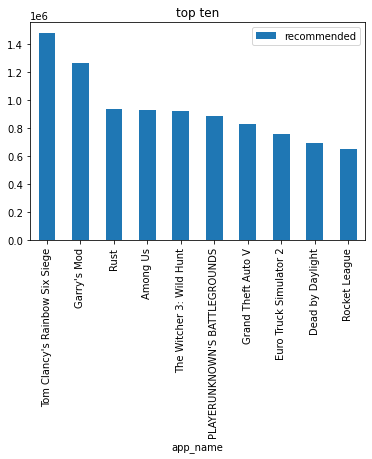

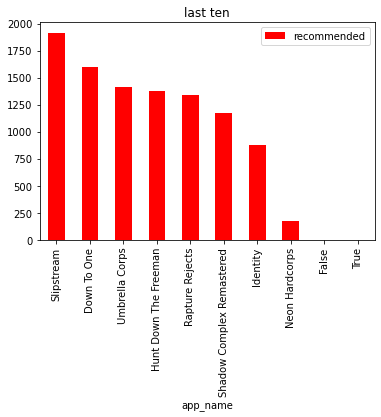

In [6]:

y=df.groupby('app_name').agg({"recommended":"sum"})
#print(y)

y=y.sort_values(by="recommended",ascending=False)
#print('the most recommended application is ...... with a total number of recommendations of .....', )
y.head(10).plot.bar(title='top ten')
#print('the worst recommended application is ..... with a total number of recommendations of ....', )
y.tail(10).plot.bar(title='last ten',color='red') #least
plt.show()

Here we ordered the apps in relation to the raccomandations and we plotted the best ten apps and the worst ten apps.
Note the differences between the y-axis dimensions



### How many of these applications were purchased, and how many were given for free?

In [7]:

print(f"The application purchased are, in percentage: {df['steam_purchase'].value_counts(normalize=True)}")
print(f"The application given for free are, in percentage: {df['received_for_free'].value_counts(normalize=True)}")

The application purchased are, in percentage: True        7.888729e-01
False       2.111267e-01
243.0       7.407407e-08
473.0       7.407407e-08
4083.0      7.407407e-08
664.0       7.407407e-08
1589.0      3.703704e-08
118348.0    3.703704e-08
1706.0      3.703704e-08
3828.0      3.703704e-08
Name: steam_purchase, dtype: float64
The application given for free are, in percentage: False     9.698472e-01
True      3.015233e-02
0.0       4.074074e-07
5245.0    3.703704e-08
Name: received_for_free, dtype: float64


We can note that the percentage of steam_purchased applications is over the 77% and the percentage of the given_for_free ones is over 96%. At first glance this values couldn't make sense, but we can consider that part of the applications given for free to the final users can be purchased by someone that wants the applications to be reviewed

# RQ3: Now it's important to understand the preferred time to do reviews.




## Request 1


I'll use the already loaded-in-memory dataset (in the variable df) in order to map every timestamp_created entry from the Datetime format, to a tuple made by the integer value of hour and minutes, once it's done i'll use the obtained column to group by the mapped rows counting the occourrence of every distinct row, i've subsequently used that pd.Series in order to extract the couple (hour, minutes) that maximizes the number of rows, so the number of reviews made in that hour range

The results are printed with a formatted string

In order to work with the datetime format from all the rows coming from the different files, we needed to preprocess the files given that the optional files contains strings and other problematic values.<br>
Hence we've opened that file cleaning all the problematic rows and mantaining only the ones with a valid value for the creation and update timestamp with the following command:
```
df = df[df.timestamp_updated.apply(lambda x: not str(x).isalpha())].astype('float').astype('int')
```
After the cleaning we've stored the result in the csv file at the path 'data/datetime_dataframe.csv' that contains only the column relatives to the creation and update timestamp.<br>
This file will be read with the ```read_csv_with_time``` function that will read and convert all the integer timestamp in the datetime format

## NB:
We know that with this type of processing we've removed all the lines containing in the 'timestamp_updated' field one of the following:
 * True
 * False
 * NaN
But it's the safer way in order to avoid 'dirty' data given that the only interpretation that can be given to this is that the review has been updated (True) or not (False) or there aren't enough info (NaN), but we need the timestamp of *when* the review has been updated and not just *if* it is

In [ ]:
datetime_df = read_csv_with_time(timestamp_dataframe, ['timestamp_created', 'timestamp_updated'])

In [ ]:
timed = datetime_df.timestamp_created.apply(lambda x: (x.hour, x.minute))
# grouping by values (the tuples of above) and counting the occourrences
timed = timed.groupby(timed).count() 
amax = timed.argmax() # Getting the index of the maximum value

# Retrievieng the answers and formatting them...
hh, mm = timed.index[amax]
n_rev = timed.values[amax]
hh = "{:0>2d}".format(hh)
mm = "{:0>2d}".format(mm)

print(f"The most common hour in wich are published the greater part of the reviews is at {hh}:{mm} with {n_rev} reviews published")

### Request 2

The function required is the following and returns a pd.Series where the index are the index of the corresponding hour range and the values are the number of reviews made in that range

In [27]:
def get_time_range_stats(ranges):
    df = read_csv_with_time('data/datetime_dataframe.csv', ['timestamp_created'], usecols=['timestamp_created'])
    ranges_int = get_integer_ranges(ranges)
    ranged = df.timestamp_created.apply(lambda x: get_integer_range_index((x.hour, x.minute, x.second), ranges_int))
    ranged = ranged.groupby(ranged).count()
    return ranged

### Request 3

I've used the function above in order to plot by an horizontal bar chart, the number of reviews made for every hour range of the default ranges shown in the table above

In [26]:
time_ranges_df = get_time_range_stats(def_ranges)

tot_rev: 26999988


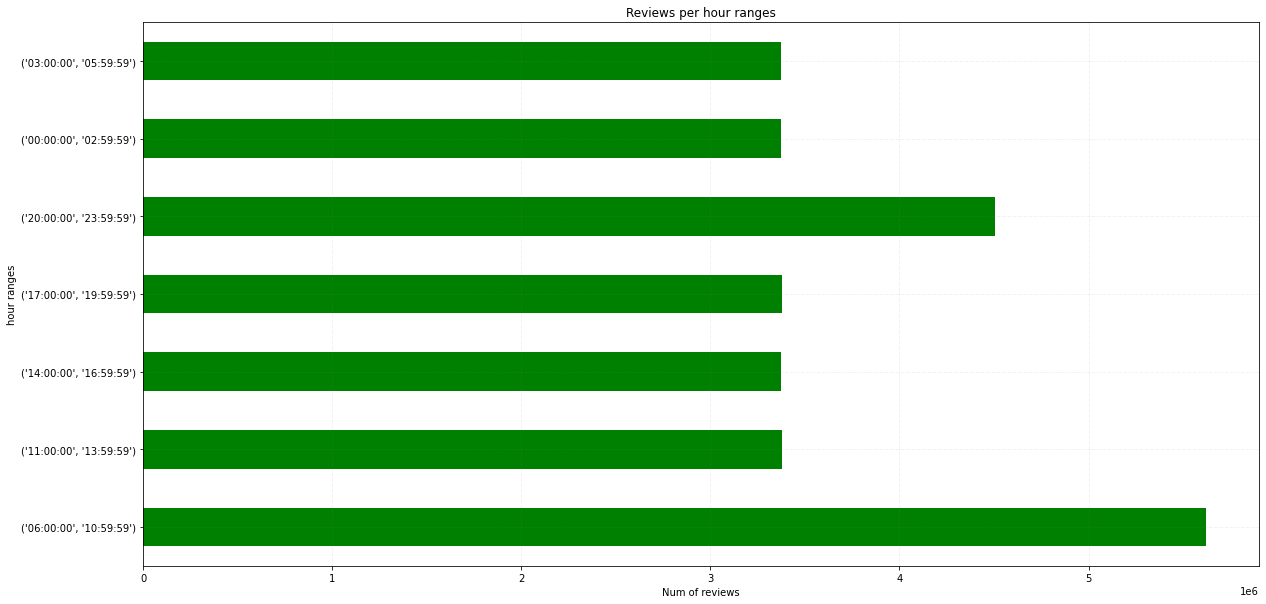

In [28]:
plt.figure(figsize=(20,10))
ax = time_ranges_df.plot(kind="barh", color='green')
ax.set_title("Reviews per hour ranges")
ax.set_ylabel("hour ranges")
ax.set_xlabel("Num of reviews")
ax.set_yticklabels(def_ranges)
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
print(f"tot_rev: {time_ranges_df.values.sum()}")

# RQ4 As Steam is a worldwide platform, the reviews can be done in many languages. Let's extract some information about it.

### What are the top 3 languages used to review applications?

Group values by language and account.


In [18]:
lingue=df["language"].value_counts(normalize=True)
top=lingue[:3]
top_list=list(top.index)
print(*(x for x in top_list), sep='\n')
#top five

english
schinese
russian


### Create a function that receives as parameters both the name of a data set and a list of languages’ names and returns a data frame filtered only with the reviews written in the provided languages.

In [19]:

def filter_language(dataset, languages,col_name):
  return dataset.loc[dataset[col_name].isin(languages)]


### Use the function created in the previous literal to find what percentage of these reviews (associated with the the top 3 languages) were voted as funny?

After creating the subset by filtering with the function, we look for the lines that correspond to each language and that have at least one "vote_funny". Same for "vote_helped".

In [20]:
for i in top_list:
     print(i+"   "+str(round(sum((df['votes_funny']!=0) & (df['language']==i))/sum(df['language']==i),2))+"%")


english   0.11%
schinese   0.11%
russian   0.11%


### Use the function created in the literal “a” to find what percentage of these reviews (associated with the top 3 languages) were voted as helpful?

In [21]:
df_1= filter_language(df,top_list,'language') #dati filtrati
for i in top_list:
  print(i+"   "+str(round(sum((df['votes_helpful']!=0) & (df['language']==i))/sum(df['language']==i),2))+"%")

english   1.0%
schinese   1.0%
russian   1.0%


# RQ5 The reviews' authors are users from the game that provide their opinion on it. Now you can check how often they make reviews.

### Plot the top 10 most popular reviewers and the number of reviews.

In [15]:
#df= pd.read_csv('/content/drive/MyDrive/HW2-ADM/steam_reviews.csv',nrows=10000000)
df_auth = df.groupby('author.steamid').review_id.count().sort_values(ascending=False)
#df_auth[:10].plot.bar()

<AxesSubplot:xlabel='author.steamid'>

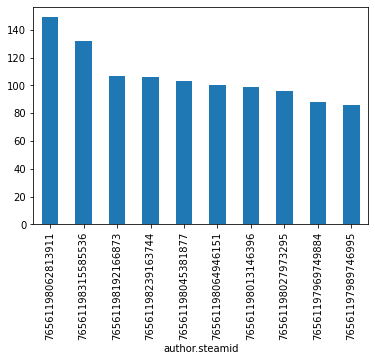

In [16]:
df_auth.head(10).plot.bar()

### What applications did the most popular author review? 

In [17]:
#ALESSANDRO from_bigger_reviewer = df[df['author.steamid'] == df_auth[:1].index[0]]
from_bigger_reviewer = df[df['author.steamid'] == df_auth.head(1).index[0]]

In [18]:
from_bigger_reviewer['app_name']

512675                     Half-Life
539037        Counter-Strike: Source
658130      Half-Life 2: Episode Two
849477                      Portal 2
1549581                  Garry's Mod
                      ...           
21578107               Hollow Knight
21624890               Day of Infamy
21651066                  SimAirport
21656340               Dead Rising 4
21672218    Styx: Shards of Darkness
Name: app_name, Length: 149, dtype: object

### How many applications did he purchase, and how many did he get as free? Provide the number (count) and the percentage.

In [19]:
'''
ALESSANDRO
free = from_bigger_reviewer[from_bigger_reviewer.received_for_free]
n_free = len(free)
purchased = from_bigger_reviewer[from_bigger_reviewer.steam_purchase]
n_purch = len(purchased)
tot = len(from_bigger_reviewer)
print(f"He got for free {n_free} applications ({n_free/tot*100}%) and purchased {n_purch} ({n_purch/tot*100}%) on total of {tot}")
print('   ')
print(f"The author's recommended {len(free['recommended'])} and doesn't recommended {n_free-len(free['recommended'])} application from the ones received for free")
'''
free = from_bigger_reviewer[from_bigger_reviewer['received_for_free']]
n_free = len(free)
purchased = from_bigger_reviewer[from_bigger_reviewer['steam_purchase']]
n_purch = len(purchased)
tot = len(from_bigger_reviewer)
print(f"He got for free {n_free} applications ({n_free/tot*100}%) and purchased {n_purch} ({n_purch/tot*100}%) on total of {tot}")
print('   ')
print(f"The author's recommended {len(free['recommended'])} and doesn't recommended {n_free-len(free['recommended'])} application from the ones received for free")


He got for free 4 applications (2.684563758389262%) and purchased 110 (73.8255033557047%) on total of 149
   
The author's recommended 4 and doesn't recommended 0 application from the ones received for free


### How many of the applications he purchased reviewed positively, and how many negatively? How about the applications he received for free?

In [20]:
print('   ')
print(f" recommended {len(purchased['recommended'])} and doesn't recommended {n_purch-len(purchased['recommended'])} application from the ones purchased")

   
 recommended 110 and doesn't recommended 0 application from the ones purchased


# [RQ6] It's time to get information from the updates that a user does to his reviews.

### What is the average time (days and minutes) a user lets pass before he updates a review?

In [13]:
print(f"The average time that pass between the creation and the update of the reviews is: {(datetime_df.timestamp_updated - datetime_df.timestamp_created).mean(numeric_only=False)}")


The average time that pass between the creation and the update of the reviews is: 36 days 03:33:10.465412482


### Plot the top 3 authors that usually update their reviews.

In [14]:
df['updated'] = df.timestamp_created != df.timestamp_updated
grouped = df.groupby(df['author.steamid']).updated.sum().sort_values(ascending=False)
auth = grouped[:3].index
print("The authors that has updated their reviews more often are, in order:")
for a in auth:
  print(f"\t*{a} with {grouped[a]} updated reviews")

The authors that has updated their reviews more often are, in order:
	*76561198192166873 with 95 updated reviews
	*76561198206999976 with 61 updated reviews
	*76561198072450805 with 60 updated reviews


# RQ7 Of course, calculating probabilities is a job that any Data Scientist must know. Let's compute Some interesting figures.

### What’s the probability that a review has a Weighted Vote Score equal to or bigger than 0.5?

Simply whoever has a w. score greater than 0.5 on the total of the lines.


In [53]:
#Prob = fav. cases / possible cases
p1=sum(df['weighted_vote_score']> 0.5)/df.shape[0]
print(f"prob. to have a weighted vote score>0.5: {p1}")

prob. to have a weighted vote score>0.5: 0.20611672320738228


### What’s the probability that a review has at least one vote as funny given that the Weighted Vote Score is bigger than 0.5?

Conditional probability formula: Prob (A given B) = Prob (A intersection B) / Prob (B)


In [54]:
#prob condizionata

intersezione=sum((df['weighted_vote_score']> 0.5)& (df['votes_funny']!=0))/df.shape[0]
p2=intersezione/p1
print(f"prob. to have at least one vote as funny given that the weighted vote score is >0.5: {p2}")

prob. to have at least one vote as funny given that the weighted vote score is >0.5: 0.11225295831885336


### Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”?

Statistical definition of independence: Joint probability is the product of the marginals.
It doesn't happen here.

In [55]:
pa= sum(df['votes_funny']!=0)/df.shape[0]
print(f"Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”? {'YES' if pa*p1==intersezione else 'NO'}")
#False, quindi Non sono indipendenti

Is the probability that “a review has at least one vote as funny” independent of the “probability that a review has a Weighted Vote Score equal or bigger than 0.5”? NO


# RQ8 Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check if a hypothesis is correct or not.

### Is there a significant difference in the Weighted Vote Score of reviews made in Chinese vs the ones made in Russian? Use an appropriate statistical test or technique and support your choicv1

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
!pip3 install  researchpy
import scipy.stats as stats
import matplotlib.pyplot as plt
import researchpy as rp

In [57]:
s1=df['weighted_vote_score'][df['language'] == 'russian']
s2=df['weighted_vote_score'][df['language'] == 'schinese']
print(s1.describe())
print(s2.describe())


count    2.943791e+06
mean     2.049889e-01
std      2.561055e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.041323e-01
max      9.895231e-01
Name: weighted_vote_score, dtype: float64
count    4.480888e+06
mean     1.387438e-01
std      2.356145e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.545455e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64


This is just an overall view: the two means are quite different (0.257 as average score for russian and 0.145 for chinese). We note that in both cases the first and second quantiles are equal to zero, this means that this is the weighted average score of many reviews. Now we represent the two distributions,without considering the cases in which the score is zero.


(0.0, 150000.0)

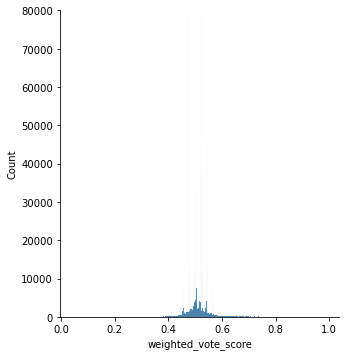

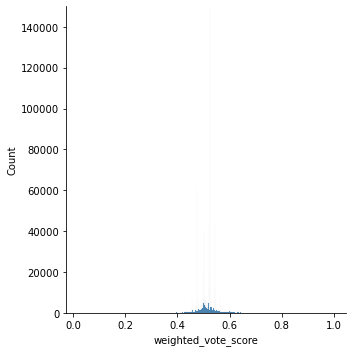

In [58]:
z1= s1[s1!=0]
z2= s2[s2!=0]
z2
sns.displot(z1)
plt.ylim(0,80000)

sns.displot(z2)
plt.ylim(0,150000)

Since N is very large, we assume to deal with normal distributions (even if in the second case the relative frequency of the average value is too high. Observe that without the zeros the two samples are much more similar.

In [59]:
print(z1.describe())
print(z2.describe())

count    1.163727e+06
mean     5.185446e-01
std      5.766553e-02
min      4.347827e-02
25%      4.962406e-01
50%      5.223221e-01
75%      5.238096e-01
max      9.895231e-01
Name: weighted_vote_score, dtype: float64
count    1.177939e+06
mean     5.277824e-01
std      7.647648e-02
min      2.384956e-02
25%      5.018868e-01
50%      5.238096e-01
75%      5.275590e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64


Under this assumption we apply a T-test that is a parametric test used to test for a statistically significant difference in the means between 2 groups. 

In [60]:
summary, results = rp.ttest(group1= z1, group1_name= "Russian", group2= z2, group2_name= "Chinese",  equal_variances= False)
#print(summary)
print(results)

                      Welch's t-test       results
0  Difference (Russian - Chinese) =  -9.200000e-03
1              Degrees of freedom =   2.189774e+06
2                               t =  -1.044454e+02
3           Two side test p value =   0.000000e+00
4          Difference < 0 p value =   0.000000e+00
5          Difference > 0 p value =   1.000000e+00
6                       Cohen's d =  -1.363000e-01
7                       Hedge's g =  -1.363000e-01
8                   Glass's delta =  -1.602000e-01
9                     Pearson's r =   7.040000e-02


Based on the p-value in the third case, Difference > 0,that is equal to 1, we accept the null hypothesis, so we can say that there is a difference.

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.

An idea could be fitted a linear regression, where y=W vote score is the dependent variable and the time between creation and update is the predictor.

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')
import numpy as np

In [62]:
y=df[ 'weighted_vote_score'] #dependent var
y=np.array(y)
t2=(df.timestamp_updated - df.timestamp_created).apply(lambda x: x.timestamp()).astype(int) #predictor
t2=np.array(t2)
t2=t2.reshape((-1, 1))

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(t2, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

In [ ]:

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

The square R shows the amount of variance explained by the model. It's something like your model's capabilities. The adjusted R squared is also similar to the R squared, but it only counts statistically significant variables. In our case, they are both very low. The coefficient of x is statistically significant (p<0.05), but it is so low as to be insignificant. Also graphically we see that the line does not fit well with the model, therefore we cannot say that there is a significant (linear) relationship-

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.figure(dpi = 75)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model: Actual vs Estimated Scores")
plt.show()

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

We again fit a regression adding the variable "reccomended" as boolean (False=0,True=1).


In [63]:
t3=df['recommended'].astype(int)
t4=t2=(df.timestamp_updated - df.timestamp_created)
t4=np.array(t4)
X_1=np.vstack([t4,t3])
X_1 = X_1.transpose()


ValueError: cannot convert float NaN to integer

In [64]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

NameError: name 'X_1' is not defined

In [65]:
X1_train = sm.add_constant(X1_train)
results1 = sm.OLS(y1_train, X1_train).fit()
results1.summary()

NameError: name 'X1_train' is not defined

Surely the R-square value is higher, we have a slightly better model. Both variables are stat. significant and looking at the coefficient of x2 (recmmended) equal to -0.13 we can say that we expect the score to be lower than 0.13 when recommended = 0, or False (compared to the expected average score). Again the time coefficient is very small, even if bigger then the previous case. To sum up, we can say that the "link" between the variables is slightly stronger in this case, but not worthy of note.

### What are histograms, bar plots, scatterplots and pie charts used for?

A histogram is visula representation of the distribution of numerical data usually grouped in bins which a non 
overlapped series of intervals.
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights 
or lengths proportional to the values that they represent.
A scatter plot uses dots to represent values for two different numeric variables expressing the relationship that 
occurs between the two variables.
A pie chart is a circular graphic method which is used to illustrate numerical proportion into a group of variables.


### What insights can you extract from a Box Plot?

The box-plot is a graphical representation that can be used to describe the distribution of data through 5 indices: the minimum, the maximum, the median (quantile lev=0.5) and the first and third quartiles.
The "box" is delimited by the first and third quartiles (so the height is the interquantile difference IQR = q3-q1)and divided inside by the median. The "whiskers" are delimited by the minimum and maximum of the values. In this way the data is divided into four intervals with the same number of elements and this shows, for example, if the distribution is symmetric or not. Data that does not fit into the "whiskers" are called outliers, they are defined as outside the interval [-IQR,+IQR].

# Bonus points

In [ ]:
'''
For this homework, you are required to work with all data in the steam_reviews.csv. An extension (two files) 
of the dataset is available in the next links:

a. File 1 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_1.zip.

b. File 2 to be downloaded from https://sapienza2021adm.s3.eu-south-1.amazonaws.com/steam_reviews_bonus_2.zip.

It is not necessary to use the extension for this homework, however, if you decide to use it, we will take it into
account in the final evaluation. In summary, to get the bonus points you are required to work with
[steam_reviews.csv + two files of extension] all together.
''';


# Theoretical Questions

# TQ1

In [ ]:
'''
We are given the following algorithm.

Input: 
    A: array of length n
    k: integers between 1 and n
    
function alg(A, k):
  s <-- a random element of A
  set L = [all the elements of A with value <= s]
  set R = [all the elements of A with value > s]
  r = len(L)
  if k == r:
    return s
  else if k < r:  
    return alg(L, k)
  else:
    return alg(R, k - r)
''';
import random
#IMPLEMENTATION

def alg(A, k):
    #s= a random element of A
    s=random.choice(A)
#    print(s)
    L = [x for x in A if x<=s]
  #  print('L=',L)
    R = [x for x in A if x>s]
   # print('R=',R)
    lung = len(L)
    if k == lung:
        return s
    elif k < lung:  
        return alg(L, k)
    else:
        return alg(R, k - lung)


### What does the algorithm compute?

The algorith find the k smallest element in the Array.

### What is asymptotically (i.e., we are asking for big-O complexity) the running time of the algorithm in the worst case, as a function of n?

The worst case occurs when s=min(A)  and k=len(A).
In this situation: $$\begin{align}T(n) &= n + T(n-1)\\&= n + (n-1) + T(n-2)\\&= ...\\&=   \sum_{i=0}^{n}(n-i)\\&= (\sum_in - \sum_i i)\\&= ...\\&= n^2 - n\\&=O(n^2) \end{align}$$

There are degenerate cases where we can not guarantees the convergence of the algorithm:
* K=0
* s=max(A): the probability is almost 0, but we can not exclude this behaviour
* the element we are looking is repeated in the array


The best case occurs for k=len(L) and the running time is $$ T(n)=1+n+1+1= O(n) $$

The medium running time is $$ O(n) $$
Given the output of the function below

In [ ]:
def get_exec_metrics(n_loops, a, k):
    cum = 0
    for _ in range(int(n_loops)):
        cum += alg(a, k)
    return cum/(len(a)*n_loops), len(a)


k=1
a = list(set([random.randint(0, 100) for _ in range(50)]))
n = len(a)
n_coeff, _ = get_exec_metrics(1e5, a, k)
print(f"For k= {k} we have, after 1e5 run, {n_coeff} times n with n= {n}")
    
k = n//2
n_coeff, _ = get_exec_metrics(1e5, a, k)
print(f"For k= {k} we have, after 1e5 run, {n_coeff} times n with n= {n}")

k = n
n_coeff, _ = get_exec_metrics(1e5, a, k)
print(f"For k= {k} we have, after 1e5 run, {n_coeff} times n with n= {n}")


# TQ2

In [ ]:
'''
You are given the recursive function splitSwap, which accepts an array a, an index i, and a length n.

function splitSwap(a, l, n):
  if n <= 1:
    return
  splitSwap(a, l, n/2)
  splitSwap(a, l+ n /2, n/2)
  swapList(a, l, n)
  
The subroutine swapList is described here:

function swapList(a, l, n):
  for i = 0 to n/2:
    tmp = a[l + i]
    a[l + i] = a[l + n/2 + i]
    a[l + n/2 + i] = tmp
'''
#IMPLEMENTATION


def splitSwap(a, l, n, lvl=0):
    if n <= 1:
        return
    indent = '\t'*lvl
    print(f"{indent}entered at lvl {lvl} with a: {a}\n")
    splitSwap(a, l, n//2, lvl+1)
    splitSwap(a, l+ n//2, n//2, lvl+1)
    print(f"{indent}* a pre_swap: {a}")
    swapList(a, l, n)
    print(f"{indent}* a after_swap: {a}\n\n")


def swapList(a, l, n):
    # n//2 times we do 3 operations
    for i in range(n//2):
        tmp = a[l + i]
        a[l + i] = a[l + n//2 + i]
        a[l + n//2 + i] = tmp
    
splitSwap([i for i in range(1,9)], 0, 8)




### How much running time does it take to execute splitSwap(a, 0, n)? (We want a Big O analysis.)

$$\begin{align}T(n) &= \frac{3n}{2} + 2T(\frac{3n}{2})\\&= \frac{3n}{2} + 2(\frac{3n}{2^2} + 2T(\frac{3n}{2^2}))\\&= \frac{3n}{2} + 2\frac{3n}{2^2} + 2^2T(\frac{3n}{2^2})\\&= ...\\&= 3\cdot \sum_{i=1}^{log_2(n)} 2^{i-1} \frac{n}{2^i}\\&= 3\cdot n \cdot \sum_{i=1}^{log_2(n)} 2^{i-1} \frac{1}{2^i}  = n \cdot \frac{3}{2} \sum_{i=1}^{log_2(n)} 1 \\&= n \cdot \frac{3}{2} \cdot log_2(n) = O(n\cdot log_2(n))\end{align}$$

### What does this algorithm do? Is it optimal? Describe the mechanism of the algorithm in details, we do not want to know only its final result. HINT: Consider the scenario where len(a) and n are numbers that are a power of 2.

The algorith reverse the subarray starting from the index i untill i+n : as the implementation shows, in every
level we swap a subarray of dimension 2^(log2(n)-1-level).

So the algorithm works as follow:
1) Takes a list *A*, a starting index *l* and a len of the sublist *n*<br>
2) Reverses the first $\frac{n}{2}$ elements of the *A*'s sublist starting from *l* to $l + \frac{n}{2}$ <br>
3) Reverses the second $\frac{n}{2}$ elements of the *A*'s sublist starting from $l + \frac{n}{2}$ to $l + n$<br>
4) Given that the swapped sublists are in the wrong order we use swapList in order to change the *i-th* element with the $i+\frac{n}{2}$*-th* one starting from the posizion *l* to the position *l + n*<br>

The algorith is not optimal since we can solve the same problem with an algorith with O(n)=n.
For example we can consider another array B in which we store the elements of the Array A from the index l+n untill l 
( step=-1) and then we could copy the elements of B in the positions l untill l+n of A


In [ ]:
def another_algorith(A,l,n):
    B=[]
    for i in range(l+n,l,-1):
        B.append(A[i])
    for i in range(l,l+n):
        A[i]=B[i-l]
        

# TQ3

In [ ]:
'''
In the knapsack problem we are given n objects and each object i has a weight w_i and a value v_i.
We are also given a weight budget W. The problem is to select a set of objects with total weight bounded by W 
that maximized the sum of their values. The following are three natural heuristics:

*Order them in increasing order of weight and then visit them sequentially, adding them to the solution 
as long as the budget is not exceeded

*Order them in decreasing order of values, and then visit them sequentially, adding them to the solution 
if the budget is not exceeded

*Order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them to the 
solution if the budget is not exceeded
''';

### For each of the heuristics, provide a counterexample, that is, an example of a problem instance in which the heuristic fails to provide the optimal solution.

### First 

Suppose the existence of two elements A={p=2,v=2}, B={p=1,v=0} and set the weight budget=W=2.
If we order the objects in increasing order of weight and then visit them sequentially, adding them to the solution
as long as the budget is not exceeded , we will find {B} with a total value of 0.
This is not an optimal solution since the solution given by {A} respects the weight costraint 
and has a total value of 2.

### Second

Suppose the existence of three elements A={v=3,p=3},B={v=2,p=1},C={p=1,v=2} and set the weight budget=3.
If we order them in decreasing order of values, and then visit them sequentially, adding them to the 
solution if the budget is not exceeded, we will find {A} with a total value of 3.
This is not an optimal solution since the solution given by {B,C} has a total weight of 2 and a total value of 4.


### Third

Suppose the existence of two elements A={v=2,p=1,v/p=2}, B={v=3,p=3,v/p=1} and set the weight budget=3.
If we order them in decreasing relative value (v_i / w_i), and then visit them sequentially, adding them
to the solution if the budget is not exceeded, we will find {A} with a total value of 2.
This is not an optimal solution since the solution given by {B} respects the weight costraint 
and has a total value of 3.